In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf

In [ ]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
physical_devices=tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)
tf.config.experimental.set_memory_growth(physical_devices[0],True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
import tensorflow as tf
import os
import numpy as np
import tensorflow_datasets as tfds

In [ ]:

def create_model():
  return tf.keras.Sequential(
      [tf.keras.layers.Conv2D(32, (5,5), activation='relu', padding='same', input_shape=(100, 100, 1)),
       tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'),
       tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
       tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'),
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(1024, activation='relu'),
       tf.keras.layers.Dropout(0.4),
       tf.keras.layers.Dense(27)
       ])
  

In [ ]:

model = create_model()
model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['sparse_categorical_accuracy'])
  
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 100, 100, 32)      832       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 50, 50, 32)        25632     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 20000)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              20481024  
_________________________________________________________________
dropout (Dropout)            (None, 1024)             

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir = '/content/drive/MyDrive/Colab Notebooks/ASL/train'
test_dir = '/content/drive/MyDrive/Colab Notebooks/ASL/test'

train_datagen = ImageDataGenerator(rescale = 1.0/255)
train_dataset = train_datagen.flow_from_directory(
                                                train_dir,
                                                target_size = (100,100),
                                                class_mode = "categorical",
                                                batch_size = 16,
                                                color_mode='grayscale'
)
test_datagen = ImageDataGenerator(rescale = 1.0/255)
test_dataset = test_datagen.flow_from_directory(
                                                test_dir,
                                                target_size = (100,100),
                                                class_mode = 'categorical',
                                                batch_size = 16,
                                                color_mode='grayscale'
)

Found 26999 images belonging to 27 classes.
Found 4050 images belonging to 27 classes.


In [ ]:
with tf.device('/device:GPU:0'):
    model = create_model()
    model.compile(optimizer='adam',
                    # Anything between 2 and `steps_per_epoch` could help here.
                    steps_per_execution = 50,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

    #epochs = 5
    batch_size=128
    #steps_per_epoch = 26999 // batch_size
    #validation_steps = 4050 // batch_size

    history = model.fit(x=x,y=y_train,batch_size=64,
                        epochs = 10,
                        validation_split=0.1,)              #validation_data=test_dataset,
                    #validation_steps=validation_steps)

Epoch 1/10


ValueError: ignored

In [ ]:
lab=['space']
for i in range(26):
    lab.append(chr(i+65))
lab

['space',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [ ]:
import os
path='/content/drive/MyDrive/Colab Notebooks/ASL/'
os.mkdir(os.path.join(path,'train'))
for l in lab:
    os.mkdir(os.path.join(path,'train/',l))
  #os.mkdir(os.path.join('master_data/testing/', emotion))

In [ ]:
path='/content/drive/MyDrive/Colab Notebooks/ASL/'
os.mkdir(os.path.join(path,'test'))
for l in lab:
    os.mkdir(os.path.join(path,'test/',l))

In [ ]:
import string
import shutil
split_size = 0.9
import os
import numpy as np
# for emotion, images in data.items():
  # train_size = int(split_size * len(images))
  # train_images = images[:train_size]
  # test_images = images[train_size:]
# lab=['space']
# for i in range(26):
#     lab.append(chr(i+65))
# for i in range(20, 23):
#   print(i)
#   source = os.path.join('/content/drive/MyDrive/Colab/ASL/asl_alphabet_train', string.ascii_uppercase[i])
#   dest = os.path.join('/content/drive/MyDrive/Colab/ASL/train', string.ascii_uppercase[i])
#   src_files = os.listdir(source)
#   for j in range(len(src_files)):
#     if j%10 == 0:
#       continue
#     full_file_name = os.path.join(source, src_files[j])
#     if os.path.isfile(full_file_name):
#         shutil.copy(full_file_name, dest);

for i in range(0, 26):
    print('\n')
    print(i)
    source = os.path.join('/content/drive/MyDrive/Colab Notebooks/ASL/asl_alphabet_train', string.ascii_uppercase[i])
    dest = os.path.join('/content/drive/MyDrive/Colab Notebooks/ASL/train/', string.ascii_uppercase[i])
    src_files = os.listdir(dest)
    print(len(src_files))
for i in range(0, 26):
    print('\n')
    print(i)
    source = os.path.join('/content/drive/MyDrive/Colab Notebooks/ASL/asl_alphabet_train', string.ascii_uppercase[i])
    dest = os.path.join('/content/drive/MyDrive/Colab Notebooks/ASL/test/', string.ascii_uppercase[i])
    src_files = os.listdir(dest)
    print(len(src_files))



0
1000


1
1000


2
1000


3
1000


4
1000


5
1000


6
1000


7
1000


8
1000


9
1000


10
1000


11
1000


12
1000


13
1000


14
1000


15
1000


16
1000


17
1000


18
1000


19
1000


20
1000


21
1000


22
1000


23
1000


24
999


25
1000


0
150


1
150


2
150


3
150


4
150


5
150


6
150


7
150


8
150


9
150


10
150


11
150


12
150


13
150


14
150


15
150


16
150


17
150


18
150


19
150


20
150


21
150


22
150


23
150


24
150


25
150


In [ ]:
!pip install tensorflow-gpu

In [ ]:
!nvidia-smi

Fri Jul 16 06:58:15 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     7W /  75W |      2MiB /  7611MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import csv
data = {}
with open ('/content/drive/MyDrive/Colab Notebooks/ASL/asl_alphabet_train') as f:
  reader = csv.reader(f)
  next(reader)
  for row in reader:
    key = row[2].lower()
    if key in data:
      data[key].append(row[1])
    else:
      data[key] = [row[1]]

IsADirectoryError: ignored

In [ ]:
#!pip install tensorflow-gpu
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

['B1930.jpg', 'B1658.jpg', 'B2413.jpg', 'B2367.jpg', 'B2672.jpg', 'B1377.jpg', 'B2804.jpg', 'B2665.jpg', 'B1649.jpg', 'B100.jpg', 'B2049.jpg', 'B2467.jpg', 'B1854.jpg', 'B1585.jpg', 'B2112.jpg', 'B1170.jpg', 'B28.jpg', 'B2786.jpg', 'B2629.jpg', 'B1640.jpg', 'B1239.jpg', 'B1933.jpg', 'B1076.jpg', 'B1148.jpg', 'B212.jpg', 'B2666.jpg', 'B2136.jpg', 'B1598.jpg', 'B27.jpg', 'B2061.jpg', 'B1706.jpg', 'B340.jpg', 'B2042.jpg', 'B2651.jpg', 'B426.jpg', 'B1784.jpg', 'B49.jpg', 'B1860.jpg', 'B1342.jpg', 'B2076.jpg', 'B1832.jpg', 'B1445.jpg', 'B1559.jpg', 'B1641.jpg', 'B278.jpg', 'B1413.jpg', 'B1309.jpg', 'B2724.jpg', 'B221.jpg', 'B116.jpg', 'B2318.jpg', 'B181.jpg', 'B1801.jpg', 'B255.jpg', 'B1312.jpg', 'B1691.jpg', 'B1399.jpg', 'B1742.jpg', 'B277.jpg', 'B35.jpg', 'B1917.jpg', 'B2630.jpg', 'B1182.jpg', 'B1210.jpg', 'B2345.jpg', 'B2515.jpg', 'B2396.jpg', 'B2675.jpg', 'B1679.jpg', 'B1059.jpg', 'B2512.jpg', 'B457.jpg', 'B2601.jpg', 'B2130.jpg', 'B2464.jpg', 'B1874.jpg', 'B337.jpg', 'B2877.jpg', 'B295

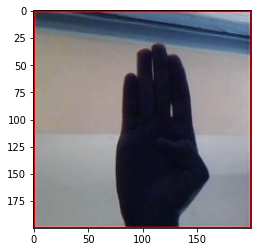

In [ ]:
import matplotlib.pyplot as plt 
import os
import cv2
train_path='/content/drive/MyDrive/Colab Notebooks/ASL/asl_alphabet_train'
print(os.listdir(train_path+'/B'))
img=cv2.imread(train_path+'/B'+'/B1.jpg')
plt.imshow(img)

In [ ]:
img.shape

(200, 200, 3)

In [ ]:
train_dir = '/content/drive/MyDrive/Colab Notebooks/ASL/train'
test_dir = '/content/drive/MyDrive/Colab Notebooks/ASL/test'

train_datagen = ImageDataGenerator(rescale = 1.0/255)
train_generator = train_datagen.flow_from_directory(
                                                  train_dir,
                                                  target_size = (100,100),
                                                  class_mode = "categorical",
                                                  batch_size = 64,
                                                  color_mode='grayscale'
)
test_datagen = ImageDataGenerator(rescale = 1.0/255)
test_generator = test_datagen.flow_from_directory(
                                                  test_dir,
                                                  target_size = (100,100),
                                                  class_mode = 'categorical',
                                                  batch_size = 64,
                                                  color_mode='grayscale'
)

Found 26999 images belonging to 27 classes.
Found 4050 images belonging to 27 classes.


Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/Colab Notebooks/ASL/train/V/V43.jpg
/content/drive/MyDrive/Colab Notebooks/ASL/train/V/V515.jpg
/content/drive/MyDrive/Colab Notebooks/ASL/train/V/V624.jpg
/content/drive/MyDrive/Colab Notebooks/ASL/train/V/V1875.jpg
/content/drive/MyDrive/Colab Notebooks/ASL/train/V/V2274.jpg
/content/drive/MyDrive/Colab Notebooks/ASL/train/V/V1074.jpg
/content/drive/MyDrive/Colab Notebooks/ASL/train/V/V66.jpg
/content/drive/MyDrive/Colab Notebooks/ASL/train/V/V2963.jpg
/content/drive/MyDrive/Colab Notebooks/ASL/train/V/V1292.jpg
/content/drive/MyDrive/Colab Notebooks/ASL/train/V/V1098.jpg
/content/drive/MyDrive/Colab Notebooks/ASL/train/V/V176.jpg
/content/drive/MyDrive/Colab Notebooks/ASL/train/V/V842.jpg
/content/drive/MyDrive/Colab Notebooks/ASL/train/V/V2068.jpg
/content/drive/MyDrive/Colab Notebooks/ASL/train/V/V674.jpg
/content/drive/MyDrive/Colab Notebooks/ASL/train/V/V2561.jpg
/content/drive/MyDrive/Colab Notebooks/ASL/

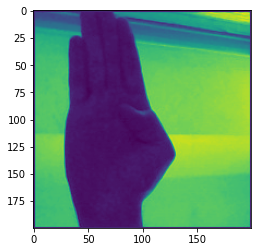

In [ ]:
train_dir = '/content/drive/MyDrive/Colab Notebooks/ASL/train'
test_dir = '/content/drive/MyDrive/Colab Notebooks/ASL/test'

import matplotlib.pyplot as plt 
import os
import cv2

x_train=[]
y_train=[]
for lab in os.listdir(train_dir):
    for j in os.listdir(os.path.join(train_dir,lab)):
        p=os.path.join(train_dir,lab,j) 
        img=cv2.imread(p)
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        print(p)
        x_train.append(gray)
        y_train.append(lab)

print(os.listdir(train_dir+'/B'))
img=cv2.imread(train_dir+'/B'+'/B155.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
print(gray.shape)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray)

In [ ]:
import numpy as np
data_path='/content/drive/MyDrive/Colab Notebooks/ASL/trn.npy'
x_tr=np.array(x_train)
x_tr.shape
np.save(data_path,x_tr)

In [ ]:
y_tr=np.array(y_train)
print(y_tr.shape,x_tr.shape)
y_tr
np.save('/content/drive/MyDrive/Colab Notebooks/ASL/ytrn.npy',y_tr)
#np.hstack()
#np.svae()

(26999,) (26999, 200, 200)


Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/Colab Notebooks/ASL/test/J/J599.jpg
/content/drive/MyDrive/Colab Notebooks/ASL/test/J/J599.jpg
/content/drive/MyDrive/Colab Notebooks/ASL/test/J/J1144.jpg
/content/drive/MyDrive/Colab Notebooks/ASL/test/J/J1144.jpg
/content/drive/MyDrive/Colab Notebooks/ASL/test/J/J358.jpg
/content/drive/MyDrive/Colab Notebooks/ASL/test/J/J358.jpg
/content/drive/MyDrive/Colab Notebooks/ASL/test/J/J2342.jpg
/content/drive/MyDrive/Colab Notebooks/ASL/test/J/J2342.jpg
/content/drive/MyDrive/Colab Notebooks/ASL/test/J/J374.jpg
/content/drive/MyDrive/Colab Notebooks/ASL/test/J/J374.jpg
/content/drive/MyDrive/Colab Notebooks/ASL/test/J/J1216.jpg
/content/drive/MyDrive/Colab Notebooks/ASL/test/J/J1216.jpg
/content/drive/MyDrive/Colab Notebooks/ASL/test/J/J1644.jpg
/content/drive/MyDrive/Colab Notebooks/ASL/test/J/J1644.jpg
/content/drive/MyDrive/Colab Notebooks/ASL/test/J/J1034.jpg
/content/drive/MyDrive/Colab Notebooks/ASL/test/J/J1034

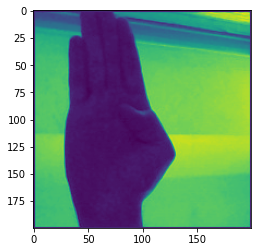

In [ ]:
train_dir = '/content/drive/MyDrive/Colab Notebooks/ASL/train'
test_dir = '/content/drive/MyDrive/Colab Notebooks/ASL/test'

import matplotlib.pyplot as plt 
import os
import cv2

x_test=[]
y_test=[]
for lab in os.listdir(test_dir):
    for j in os.listdir(os.path.join(test_dir,lab)):
        p=os.path.join(test_dir,lab,j) 
        print(p)
        img=cv2.imread(p)
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        print(p)
        x_test.append(gray)
        y_test.append(lab)

print(os.listdir(train_dir+'/B'))
img=cv2.imread(train_dir+'/B'+'/B155.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
print(gray.shape)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray)

In [ ]:
x_tst=np.array(x_test)
print(x_tst.shape)#,x_tr.shape)
x_tst
np.save('/content/drive/MyDrive/Colab Notebooks/ASL/xtst.npy',x_tst)

(4050, 200, 200)


In [ ]:
y_tst=np.array(y_test)
print(y_tst.shape,x_tst.shape)
y_tst
np.save('/content/drive/MyDrive/Colab Notebooks/ASL/ytst.npy',y_tst)

(4050,) (4050, 200, 200)


In [ ]:
import numpy as np
data_path='/content/drive/MyDrive/Colab Notebooks/ASL/trn.npy'
x_tr=np.array(x_train)
x_tr.shape
np.save(data_path,x_tr)

In [ ]:
import numpy as np
x_train=np.load('/content/drive/MyDrive/Colab Notebooks/ASL/trn.npy')
y_train=np.load('/content/drive/MyDrive/Colab Notebooks/ASL/ytrn.npy')
print(x_train.shape)
print(y_train.shape)

(26999, 200, 200)
(26999,)


In [ ]:
x_test=np.load('/content/drive/MyDrive/Colab Notebooks/ASL/xtst.npy')
y_test=np.load('/content/drive/MyDrive/Colab Notebooks/ASL/ytst.npy')
print(x_test.shape)
print(y_test.shape)

(4050, 200, 200)
(4050,)


In [ ]:
# 100,100,3 (100x100x1)
import matplotlib.pyplot as plt
import cv2
x=[]
with tf.device('/device:GPU:0'):
    for i in range(len(x_train)):
        print(i)
        x.append(cv2.resize(x_train[i],(100,100)))
    x=np.array(x)
    x=x.reshape((len(x_train),100,100,1))
    print(x.shape)


    y=y_train.reshape((len(y_train),1))
    print(y.shape)
    #plt.imshow(z)

    x_ts=[]

    for i in range(len(x_test)):
        #print(i)
        x_ts.append(cv2.resize(x_test[i],(100,100)))
    x_ts=np.array(x_ts)
    x_ts=x_ts.reshape((len(x_test),100,100,1))
    print(x_ts.shape)


    y_ts=y_test.reshape((len(y_test),1))
    print(y_ts.shape)

Streaming output truncated to the last 5000 lines.
22003
22004
22005
22006
22007
22008
22009
22010
22011
22012
22013
22014
22015
22016
22017
22018
22019
22020
22021
22022
22023
22024
22025
22026
22027
22028
22029
22030
22031
22032
22033
22034
22035
22036
22037
22038
22039
22040
22041
22042
22043
22044
22045
22046
22047
22048
22049
22050
22051
22052
22053
22054
22055
22056
22057
22058
22059
22060
22061
22062
22063
22064
22065
22066
22067
22068
22069
22070
22071
22072
22073
22074
22075
22076
22077
22078
22079
22080
22081
22082
22083
22084
22085
22086
22087
22088
22089
22090
22091
22092
22093
22094
22095
22096
22097
22098
22099
22100
22101
22102
22103
22104
22105
22106
22107
22108
22109
22110
22111
22112
22113
22114
22115
22116
22117
22118
22119
22120
22121
22122
22123
22124
22125
22126
22127
22128
22129
22130
22131
22132
22133
22134
22135
22136
22137
22138
22139
22140
22141
22142
22143
22144
22145
22146
22147
22148
22149
22150
22151
22152
22153
22154
22155
22156
22157
22158
22159
22160
2

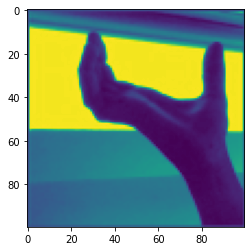

In [ ]:
plt.imshow(x_ts[10].reshape((100,100)))

In [ ]:
x=x/255.0
x_ts=x_ts/255.0
print(x.shape,x_ts.shape)

(26999, 100, 100, 1) (4050, 100, 100, 1)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
y_tr_en=ohe.fit_transform(y).toarray()
y_ts_en=ohe.transform(y_ts).toarray()
print(y_ts_en)
y_tr_en

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
with tf.device('/device:GPU:0'):
    model = tf.keras.models.Sequential([
        Conv2D(256, [3,3], activation = 'relu', input_shape =(100, 100, 1) ),
        MaxPooling2D(2,2),
        Conv2D(128, [3,3], activation = 'relu' ),
        MaxPooling2D(2,2),
        Conv2D(1024, [3,3], activation = 'relu' ),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(256, activation = 'relu'),
        Dense(27, activation = 'softmax')
    ])

    model.compile(optimizer = Adam(lr = 0.01), loss = 'categorical_crossentropy', metrics = ["accuracy"])
    model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 98, 98, 256)       2560      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 49, 49, 256)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 47, 47, 128)       295040    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 21, 21, 1024)      1180672   
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 10, 10, 1024)      0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 102400)           

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
es = EarlyStopping(monitor='val_acc', patience=2, min_delta=0.01)

In [ ]:
print(x.shape,y_tr_en.shape)
print(x_ts.shape,y_ts_en.shape)
print(type(y_train))

(26999, 100, 100, 1) (26999, 27)
(4050, 100, 100, 1) (4050, 27)
<class 'numpy.ndarray'>


In [ ]:
#dataset = tf.data.Dataset.zip((x, y))
print(y)

[['space']
 ['space']
 ['space']
 ...
 ['Z']
 ['Z']
 ['Z']]


In [ ]:

#%%timeit -n1 -r1 
with tf.device('/device:GPU:0'):
    model.fit(x=x,y=y_tr_en,batch_size=64,
                        epochs = 10,
                        verbose = 1,
                        validation_split=0.1,
              validation_data=(x_ts,y_ts_en)
                        )
    model_json = model.to_json()
    with open("model-bw.json", "w") as json_file:
        json_file.write(model_json)
    print('Model Saved')
    model.save_weights('model-bw.h5')
    print('Weights saved')

Epoch 1/10
380/380 [==============================] - 57s 141ms/step - loss: 8.8132 - accuracy: 0.0831 - val_loss: 8.7474 - val_accuracy: 0.0000e+00
Epoch 2/10
380/380 [==============================] - 51s 133ms/step - loss: 2.7342 - accuracy: 0.1384 - val_loss: 11.9325 - val_accuracy: 0.0000e+00
Epoch 3/10
380/380 [==============================] - 51s 133ms/step - loss: 2.6271 - accuracy: 0.1587 - val_loss: 13.6829 - val_accuracy: 0.0000e+00
Epoch 4/10
380/380 [==============================] - 51s 133ms/step - loss: 2.5746 - accuracy: 0.1701 - val_loss: 14.2357 - val_accuracy: 0.0000e+00
Epoch 5/10
380/380 [==============================] - 50s 133ms/step - loss: 2.3641 - accuracy: 0.2124 - val_loss: 21.5789 - val_accuracy: 0.0000e+00
Epoch 6/10
380/380 [==============================] - 51s 133ms/step - loss: 2.0723 - accuracy: 0.2827 - val_loss: 27.1898 - val_accuracy: 0.0000e+00
Epoch 7/10
380/380 [==============================] - 51s 133ms/step - loss: 1.8524 - accuracy: 0.347

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))





%tensorflow_version 2.x
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Found GPU at: /device:GPU:0
Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
3.3088981109995075
GPU (s):
0.03534311800103751
GPU speedup over CPU: 93x


In [ ]:
# Code copied from - https://keras.io/preprocessing/image/
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
train_dir = '/content/drive/MyDrive/Colab Notebooks/ASL/train'
test_dir = '/content/drive/MyDrive/Colab Notebooks/ASL/test'
sz=128
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size=(sz, sz),
                                                 batch_size=10,
                                                 color_mode='grayscale',
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size=(sz , sz),
                                            batch_size=10,
                                            color_mode='grayscale',
                                            class_mode='categorical') 

Found 26999 images belonging to 27 classes.
Found 4050 images belonging to 27 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense , Dropout
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
sz = 100
# Step 1 - Building the CNN

# Initializing the CNN
classifier = Sequential()

# First convolution layer and pooling
classifier.add(Convolution2D(64, (3, 3), input_shape=(sz, sz, 1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
# Second convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
classifier.add(MaxPooling2D(pool_size=(2, 2)))
#classifier.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
#classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
classifier.add(Flatten())

# Adding a fully connected layer
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=96, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dense(units=27, activation='softmax')) # softmax for more than 2

# Compiling the CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # categorical_crossentropy for more than 2


# Step 2 - Preparing the train/test data and training the model
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16928)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2166912   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [ ]:
with tf.device('/GPU:0'):
    classifier.fit(
            x=x,y=y_tr_en,batch_size=64,
            epochs=20,verbose = 1,
            validation_data=(x_ts,y_ts_en),)
            #validation_steps=4050)# No of images in test set


# Saving the model
model_json = classifier.to_json()
with open("model-bw.json", "w") as json_file:
    json_file.write(model_json)
print('Model Saved')
classifier.save_weights('model-bw.h5')
print('Weights saved')

Epoch 1/20
422/422 [==============================] - 57s 31ms/step - loss: 3.0998 - accuracy: 0.0886 - val_loss: 1.5575 - val_accuracy: 0.5156
Epoch 2/20
422/422 [==============================] - 12s 29ms/step - loss: 1.6761 - accuracy: 0.4235 - val_loss: 0.9237 - val_accuracy: 0.7121
Epoch 3/20
422/422 [==============================] - 12s 29ms/step - loss: 1.1382 - accuracy: 0.5975 - val_loss: 0.5862 - val_accuracy: 0.8128
Epoch 4/20
422/422 [==============================] - 12s 28ms/step - loss: 0.8510 - accuracy: 0.6861 - val_loss: 0.4237 - val_accuracy: 0.8607
Epoch 5/20
422/422 [==============================] - 12s 28ms/step - loss: 0.7032 - accuracy: 0.7470 - val_loss: 0.3417 - val_accuracy: 0.8968
Epoch 6/20
422/422 [==============================] - 12s 28ms/step - loss: 0.5791 - accuracy: 0.7904 - val_loss: 0.2744 - val_accuracy: 0.9195
Epoch 7/20
422/422 [==============================] - 12s 28ms/step - loss: 0.5169 - accuracy: 0.8126 - val_loss: 0.2223 - val_accuracy:

In [ ]:
classifier.save('/content/drive/MyDrive/Colab Notebooks/ASL/my_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/ASL/my_model/assets


In [ ]:
classifier.evaluate(x_ts,y_ts_en)

127/127 [==============================] - 1s 8ms/step - loss: 0.0784 - accuracy: 0.9763


[0.0784301608800888, 0.9762963056564331]

In [ ]:
classifier.evaluate(x=x,y=y_tr_en)

844/844 [==============================] - 7s 8ms/step - loss: 0.0241 - accuracy: 0.9942


[0.02413404919207096, 0.9942219853401184]

In [ ]:
pred=classifier.predict(x_ts)
pred

array([[1.3820064e-23, 7.2443023e-27, 6.6078506e-19, ..., 5.6625551e-05,
        2.2650096e-13, 9.9994338e-01],
       [5.8634041e-37, 9.8717096e-37, 8.3267467e-29, ..., 6.9372093e-14,
        1.2721628e-23, 9.9999988e-01],
       [6.1552800e-14, 5.4500779e-16, 1.3959729e-10, ..., 3.2690144e-04,
        1.1535948e-07, 9.9899858e-01],
       ...,
       [3.3425002e-15, 3.8548174e-23, 3.2993445e-12, ..., 2.2977240e-06,
        9.9999678e-01, 3.7737198e-14],
       [1.3618143e-12, 2.0486087e-22, 1.3140297e-09, ..., 3.3601823e-06,
        9.9994028e-01, 5.7421329e-15],
       [1.1284691e-08, 8.3634441e-15, 1.2015765e-05, ..., 3.2838754e-04,
        9.9893564e-01, 8.6614378e-09]], dtype=float32)

In [ ]:
import numpy as np
index=np.argmax(pred,axis=1)
index

array([26, 26, 26, ..., 25, 25, 25])

In [ ]:
lab=[]
lab_dic={'space':26}
for i in range(26):
    lab_dic[chr(i+65)]=i
    lab.append(chr(i+65))
lab.append('space')
print(lab_dic)
#r=['a','b','c']
#q=np.array([0,1,0,1,2,0,2,1,2,0,1,2,0,1,0])
res=[-1 for i in range(len(y_test))]
for i in range(len(y_test)):
    #print(r[q[i]])
    res[i]=lab_dic[y_test[i]]
res=np.array(res)
print(res)

{'space': 26, 'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25}
[26 26 26 ... 25 25 25]


In [ ]:
tf.math.confusion_matrix(labels=res,predictions=index)

<tf.Tensor: shape=(27, 27), dtype=int32, numpy=
array([[150,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0, 149,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  3,   0, 147,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  2,   0,   0, 148,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  8,   2,   0,   0, 138,   1,   1,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0, 150,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
      

In [ ]:
# reading model from saved model
new_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/ASL/my_model')

# Check its architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16928)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2166912   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [ ]:
pred=new_model.predict(x_ts)
pred

array([[1.3820064e-23, 7.2443023e-27, 6.6078506e-19, ..., 5.6625551e-05,
        2.2650096e-13, 9.9994338e-01],
       [5.8634041e-37, 9.8717096e-37, 8.3267467e-29, ..., 6.9372093e-14,
        1.2721628e-23, 9.9999988e-01],
       [6.1552800e-14, 5.4500779e-16, 1.3959729e-10, ..., 3.2690144e-04,
        1.1535948e-07, 9.9899858e-01],
       ...,
       [3.3425002e-15, 3.8548174e-23, 3.2993445e-12, ..., 2.2977240e-06,
        9.9999678e-01, 3.7737198e-14],
       [1.3618143e-12, 2.0486087e-22, 1.3140297e-09, ..., 3.3601823e-06,
        9.9994028e-01, 5.7421329e-15],
       [1.1284691e-08, 8.3634441e-15, 1.2015765e-05, ..., 3.2838754e-04,
        9.9893564e-01, 8.6614378e-09]], dtype=float32)

In [ ]:
import numpy as np
index=np.argmax(pred,axis=1)
index

array([26, 26, 26, ..., 25, 25, 25])

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'space']


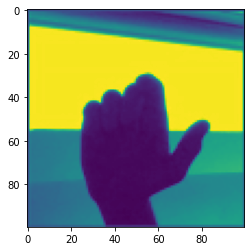

Actual T
Predicted T


In [ ]:
lab=[]
for i in range(26):
    lab.append(chr(i+65))
lab.append('space')
print(lab)
def show_img(x):
    plt.imshow(x.reshape((100,100)))
    plt.show()
i=3124#3321#3327#3320
show_img(x_ts[i])
print('Actual',y_test[i])
print('Predicted',lab[index[i]])

In [ ]:
new_model.evaluate(x,y_tr_en)

844/844 [==============================] - 7s 8ms/step - loss: 0.0241 - accuracy: 0.9942


[0.02413404919207096, 0.9942219853401184]

In [ ]:
new_model.evaluate(x_ts,y_ts_en)

127/127 [==============================] - 1s 8ms/step - loss: 0.0784 - accuracy: 0.9763


[0.0784301608800888, 0.9762963056564331]